In [47]:
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd 

In [48]:
feature_names = list(data.feature_names)
outcomes = data.target
input_data = data.data

In [49]:
shape = input_data.shape

df = pd.DataFrame(data.data, columns=feature_names)
normalized_df=(df-df.min())/(df.max()-df.min())
print(normalized_df)

     mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0       0.521037      0.022658  ...        0.598462                 0.418864
1       0.643144      0.272574  ...        0.233590                 0.222878
2       0.601496      0.390260  ...        0.403706                 0.213433
3       0.210090      0.360839  ...        1.000000                 0.773711
4       0.629893      0.156578  ...        0.157500                 0.142595
..           ...           ...  ...             ...                      ...
564     0.690000      0.428813  ...        0.097575                 0.105667
565     0.622320      0.626987  ...        0.198502                 0.074315
566     0.455251      0.621238  ...        0.128721                 0.151909
567     0.644564      0.663510  ...        0.497142                 0.452315
568     0.036869      0.501522  ...        0.257441                 0.100682

[569 rows x 30 columns]


In [50]:
X_train, X_test, y_train, y_test = train_test_split(df, outcomes)

In [51]:
model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

acc = model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/lo

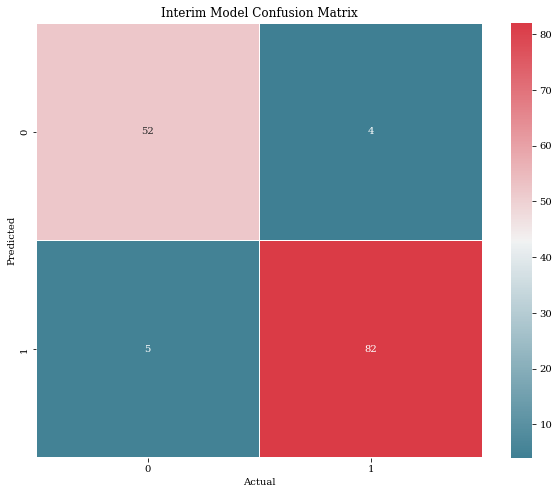

In [52]:
# Confusion matrix
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix


fig, ax = plt.subplots(figsize=(10, 8))
plt.rcParams['font.family']='serif'

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True), linewidths=.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.title('Interim Model Confusion Matrix')
plt.show()